In [113]:
import pysam
from collections import Counter
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pyranges as pr


In [85]:
ont_alignment_dir = '/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/'
ont_alignment = list()

for file in os.listdir(ont_alignment_dir):
    if file.endswith(".bam"):
        ont_alignment.append(os.path.join(ont_alignment_dir, file))
ont_alignment.sort()
ont_alignment

['/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day0_1.nonred.genome.sorted.bam',
 '/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day0_2.nonred.genome.sorted.bam',
 '/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day0_3.nonred.genome.sorted.bam',
 '/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day3_1.nonred.genome.sorted.bam',
 '/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day3_2.nonred.genome.sorted.bam',
 '/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day3_3.nonred.genome.sorted.bam',
 '/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day5_1.nonred.genome.sorted.bam',
 '/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day5_2.nonred.genome.sorted.bam',


In [86]:
rna_alignment_dir = '/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/'
rna_alignment = list()
for root, dirs, files in os.walk(rna_alignment_dir):
    for file in files:
        if file.endswith(".bam"):
             rna_alignment.append(os.path.join(root, file))

rna_alignment.sort()
rna_alignment.pop(0)

rna_alignment

['/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day0_1/Aligned.sortedByCoord.out.bam',
 '/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day0_2/Aligned.sortedByCoord.out.bam',
 '/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day0_3/Aligned.sortedByCoord.out.bam',
 '/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day0_4/Aligned.sortedByCoord.out.bam',
 '/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day0_5/Aligned.sortedByCoord.out.bam',
 '/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day1_1/Aligned.sortedByCoord.out.bam',
 '/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day1_2/Aligned.sortedByCoord.out.bam',
 '/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day1_3/Aligned.sortedByCoord.out.bam',
 '/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day1_4/Aligned.sortedByCoord.out.bam',
 '/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day1_5/Aligned.sortedByCoord.out.bam',


In [87]:
alignment = ont_alignment + rna_alignment
alignment

['/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day0_1.nonred.genome.sorted.bam',
 '/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day0_2.nonred.genome.sorted.bam',
 '/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day0_3.nonred.genome.sorted.bam',
 '/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day3_1.nonred.genome.sorted.bam',
 '/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day3_2.nonred.genome.sorted.bam',
 '/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day3_3.nonred.genome.sorted.bam',
 '/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day5_1.nonred.genome.sorted.bam',
 '/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day5_2.nonred.genome.sorted.bam',


In [81]:
# bam_fn = '/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day0_1/Aligned.sortedByCoord.out.bam'
bam_fn = '/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day0_1.nonred.genome.sorted.bam'

In [6]:
# bamfile = pysam.AlignmentFile(bam_fn, "rb") 

## Function to compute the numebr of exon-exon junctions covered by one read based on CIGAR string

CIGAR string would never start or end with 'N'.

In [7]:
# def compute_num_junction_per_read(cigar_string):
    
#     #l: length of CIGAR string
#     l = len(cigar_string)
#     #m: number of exon-exon splice junctions
#     m = 2*cigar_string.count('N')
#     #k: number of intron at either end
#     k = 0

#     #isFirstAlpha: turn False after encounter the first alphabet
#     isFirstAlpha = True
#     #isIntron: True if only 'N' in the cigar string
#     isIntron = False

#     for i in range(l):
#         if cigar_string[i].isalpha() and isFirstAlpha:
#             isFirstAlpha = False
#             if i == l-1:
#                 isIntron = True
#                 break
#             if cigar_string[i] == 'N':
#                 #intron at the 5' end
#                 k += 1

#         if i == l-1 and cigar_string[i] == 'N':
#             #intron at the 3' end
#             k += 1

#     if isIntron:
#         m = 0
#     else:
#         m -= k 
        
#     return m
    

In [82]:
def compute_num_junction_per_read(cigar_string):
    
    #m: number of exon-exon splice junctions
    m = cigar_string.count('N')
        
    return m
    

## Single reads

In [137]:
max_junction = 10
# names = list()
# mqs = list()
nums = list()
df_dic = {}
# whole_cigar = ''
read_len = list()
# for fn in alignment:
for fn in ont_alignment:
# for fn in rna_alignment:
    bamfile = pysam.AlignmentFile(fn, "rb") 
#     for read in bamfile.fetch('chr3', 149964904, 149970895): #PFN2, at most 2 exon-exon junctions
    for read in bamfile.fetch('chr14', 69767112, 69772005): #SRSF5, at most 8 exon-exon junctions
#     for read in bamfile.fetch():
    #     print(read.mapq)
#         print(read)
#         break
#         name = read.query_name
#         names.append(name)
#         mq = read.mapq
#         mqs.append(mq)

#         num = compute_num_junction_per_read(read.cigarstring)
#         nums.append(num)

        read_len.append(len(read.seq))
        
#         cigar = read.cigarstring
#         whole_cigar = whole_cigar + cigar
#     print(Counter(nums))

#     tmp_counter = Counter(nums)
#     print(tmp_counter)
#     tmp_num = list()
#     for i in range(max_junction):   #can be changed
#         tmp_num.append(tmp_counter[i])
#     df_dic[fn] = tmp_num    
#     nums = list()
    

# Counter(num)
# Counter(cigars)
# num
# df_dic = {'Name': names, 'MapQ': mqs, 'Junction': nums}
# df = pd.DataFrame(df_dic)
# print(df)
# print(whole_cigar.count('M'))
# print(whole_cigar.count('I'))
# print(whole_cigar.count('D'))
# print(whole_cigar.count('N'))
# print(whole_cigar.count('S'))
# print(whole_cigar.count('H'))
# Counter(mqs)


b7f87025-f384-4a23-b44a-7cfedd2e51d4	16	#13	69595995	60	78S6M290I175510N5M1D22M2D24M1D5M1D6M1D3M2D11M1D4M1D17M1I20M1D21M1D84M1I9M2D12M2D85M1D3M1I57M1D20M1I20M2D43M70S	*	0	0	ATACGTATCATACTCCTTATCCATCGCTTCGATCTTCTTTTTTTTTTTTTTTTTTATTTCAAAAAAAAAAATACTTTTTTTGGGTTTTATAACATTTTATTATCAAACAGTTGAGCCTGACGTTTGTCCAGCAGCTGTTAGCATGGAGACACTGACCCACCACTATAAAACAGCATTTTAAGTGTCTCAGCCACACTGTTTAATTCAGGCACCAACCAACCTGACCAACACTTTATAACCAAGAACCAACCAATCTTAGCACAAAATTAAATTTGTTTTAGTTATAAAGAGTTTCAGCCTTCAACTCCCACAGAGCACAGGCATATCACTTTAGTAGTATGGTTTGGGAATTTGTGGCCTTTTAAAACAAAACCAAAAATCCTAAACCATACTTGCTAAAATCTGGTAAGTATGTGCTTTTCTGTGGGGTGGATTTGAAGGGGTTGGGTTGGCTGATATCTTTGTAGATGTGGGACCACCAAGGGGTTGTTGAAACTAATTGTATTAAATGTCTTTGATAAGCCTTCTGCTCACATTTTTGTGAATGTCTGAAGTATATAGTTTGTGTATATTGACAGAGCTCTTTTATAACTAAAGTTAAATTTAATTTTTGTACTAGAAAAATTTGAACATTTTAGTTCTTGGTTATAAAAATGTTAATTCAGAATTAGTTTAATGCCTTAATTAAACTAATTAATAGCTTTGACAATTTAAAAGAGCTCTAAATTTGCTTGTACATAAAGGCTTAATTTGTTTTCCTTGTTAGGTCAAGGGTGTCCTCCACTCCTTTAACAGCTGCTGGACAGACATTAGAGCAGCTGTTTGTT

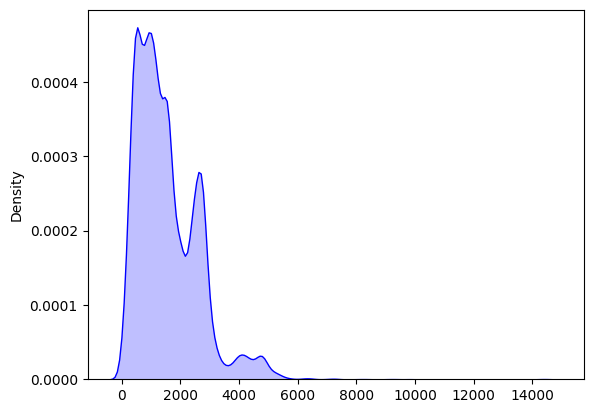

In [105]:
fig = sns.kdeplot(read_len, fill=True, color="b")
plt.show()

In [72]:
df = pd.DataFrame(df_dic)
df

,/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day0_1.nonred.genome.sorted.bam,/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day0_2.nonred.genome.sorted.bam,/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day0_3.nonred.genome.sorted.bam,/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day3_1.nonred.genome.sorted.bam,/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day3_2.nonred.genome.sorted.bam,/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day3_3.nonred.genome.sorted.bam,/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day5_1.nonred.genome.sorted.bam,/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day5_2.nonred.genome.sorted.bam,/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day5_3.nonred.genome.sorted.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day0_1/Aligned.sortedByCoord.out.bam,...,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day2_5/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day3_1/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day3_2/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day3_3/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day3_5/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day5_1/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day5_2/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day5_4/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day5_5/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day5_6/Aligned.sortedByCoord.out.bam
0,567,247,318,891,617,464,436,424,555,3829,...,9723,6612,5603,5115,7450,5046,3373,5556,6076,5039
1,105,34,37,130,136,62,80,83,80,2941,...,5131,3284,2867,2480,3542,2226,1478,3285,2680,2432
2,167,60,49,285,288,162,156,155,197,181,...,220,143,137,141,166,92,72,148,112,116
3,53,18,26,81,87,59,59,27,46,0,...,0,0,0,0,0,0,0,0,0,0
4,83,25,50,152,101,104,74,47,86,0,...,0,0,0,0,0,0,0,0,0,0
5,65,16,40,78,151,92,65,60,73,0,...,0,0,0,0,0,0,0,0,0,0
6,214,85,156,295,568,380,113,143,241,0,...,0,0,0,0,0,0,0,0,0,0
7,513,180,450,368,361,383,194,141,185,0,...,0,0,0,0,0,0,0,0,0,0
8,8,6,9,6,4,7,1,3,3,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df = df.transpose()

In [74]:
per_df = df.div(df.sum(axis=1), axis=0)
per_df

,0,1,2,3,4,5,6,7,8,9
/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day0_1.nonred.genome.sorted.bam,0.319437,0.059155,0.094085,0.029859,0.046761,0.036620,0.120563,0.289014,0.004507,0.000000
/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day0_2.nonred.genome.sorted.bam,0.368107,0.050671,0.089419,0.026826,0.037258,0.023845,0.126677,0.268256,0.008942,0.000000
/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day0_3.nonred.genome.sorted.bam,0.279930,0.032570,0.043134,0.022887,0.044014,0.035211,0.137324,0.396127,0.007923,0.000880
/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day3_1.nonred.genome.sorted.bam,0.389764,0.056868,0.124672,0.035433,0.066492,0.034121,0.129046,0.160980,0.002625,0.000000
/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day3_2.nonred.genome.sorted.bam,0.266753,0.058798,0.124514,0.037613,0.043666,0.065283,0.245569,0.156074,0.001729,0.000000
/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day3_3.nonred.genome.sorted.bam,0.270870,0.036194,0.094571,0.034442,0.060712,0.053707,0.221833,0.223584,0.004086,0.000000
/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day5_1.nonred.genome.sorted.bam,0.370119,0.067912,0.132428,0.050085,0.062818,0.055178,0.095925,0.164686,0.000849,0.000000
/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day5_2.nonred.genome.sorted.bam,0.391144,0.076568,0.142989,0.024908,0.043358,0.055351,0.131919,0.130074,0.002768,0.000923
/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day5_3.nonred.genome.sorted.bam,0.378581,0.054570,0.134379,0.031378,0.058663,0.049795,0.164393,0.126194,0.002046,0.000000
/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day0_1/Aligned.sortedByCoord.out.bam,0.550856,0.423105,0.026039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [75]:
ont_per_df = per_df.iloc[0:9, ].transpose()
ont_per_df['mean']=ont_per_df.mean(1)
ont_per_df['sem']=ont_per_df.std(1)/np.sqrt(ont_per_df.shape[1])
ont_per_df

,/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day0_1.nonred.genome.sorted.bam,/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day0_2.nonred.genome.sorted.bam,/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day0_3.nonred.genome.sorted.bam,/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day3_1.nonred.genome.sorted.bam,/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day3_2.nonred.genome.sorted.bam,/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day3_3.nonred.genome.sorted.bam,/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day5_1.nonred.genome.sorted.bam,/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day5_2.nonred.genome.sorted.bam,/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day5_3.nonred.genome.sorted.bam,mean,sem
0,0.319437,0.368107,0.279930,0.389764,0.266753,0.270870,0.370119,0.391144,0.378581,0.337189,0.015770
1,0.059155,0.050671,0.032570,0.056868,0.058798,0.036194,0.067912,0.076568,0.054570,0.054812,0.004140
2,0.094085,0.089419,0.043134,0.124672,0.124514,0.094571,0.132428,0.142989,0.134379,0.108910,0.009420
3,0.029859,0.026826,0.022887,0.035433,0.037613,0.034442,0.050085,0.024908,0.031378,0.032604,0.002445
4,0.046761,0.037258,0.044014,0.066492,0.043666,0.060712,0.062818,0.043358,0.058663,0.051527,0.003159
5,0.036620,0.023845,0.035211,0.034121,0.065283,0.053707,0.055178,0.055351,0.049795,0.045457,0.004015
6,0.120563,0.126677,0.137324,0.129046,0.245569,0.221833,0.095925,0.131919,0.164393,0.152583,0.014796
7,0.289014,0.268256,0.396127,0.160980,0.156074,0.223584,0.164686,0.130074,0.126194,0.212777,0.026910
8,0.004507,0.008942,0.007923,0.002625,0.001729,0.004086,0.000849,0.002768,0.002046,0.003942,0.000832
9,0.000000,0.000000,0.000880,0.000000,0.000000,0.000000,0.000000,0.000923,0.000000,0.000200,0.000119


In [76]:
rna_per_df = per_df.iloc[9:per_df.shape[0], ].transpose()
rna_per_df['mean']=rna_per_df.mean(1)
rna_per_df['sem']=rna_per_df.std(1)/np.sqrt(rna_per_df.shape[1])
rna_per_df

,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day0_1/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day0_2/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day0_3/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day0_4/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day0_5/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day1_1/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day1_2/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day1_3/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day1_4/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day1_5/Aligned.sortedByCoord.out.bam,...,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day3_2/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day3_3/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day3_5/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day5_1/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day5_2/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day5_4/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day5_5/Aligned.sortedByCoord.out.bam,/project/owlmayerTemporary/Derek/RNA_alignGenome/alignment/day5_6/Aligned.sortedByCoord.out.bam,mean,sem
0,0.550856,0.537876,0.546062,0.549195,0.559254,0.624402,0.617701,0.603212,0.645012,0.641099,...,0.650982,0.661194,0.667682,0.685225,0.685151,0.618089,0.68516,0.664162,0.629333,0.009249
1,0.423105,0.431543,0.423276,0.424684,0.411611,0.353771,0.357162,0.375291,0.341273,0.340272,...,0.333101,0.320579,0.317440,0.302281,0.300223,0.365447,0.30221,0.320548,0.351759,0.008185
2,0.026039,0.030581,0.030526,0.026121,0.029136,0.021827,0.025137,0.021497,0.013714,0.018629,...,0.015917,0.018226,0.014877,0.012493,0.014625,0.016465,0.01263,0.015289,0.018903,0.001155
3,0.000000,0.000000,0.000136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000006,0.000005
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [77]:

summary_dic = {'group': ['long read']*max_junction + ['short_read']*max_junction, 
              'num': list(range(max_junction))*2,
              'mean': [0]*2*max_junction, 
              'sem': [0]*2*max_junction}
summary = pd.DataFrame(summary_dic)
summary

,group,num,mean,sem
0,long read,0,0,0
1,long read,1,0,0
2,long read,2,0,0
3,long read,3,0,0
4,long read,4,0,0
5,long read,5,0,0
6,long read,6,0,0
7,long read,7,0,0
8,long read,8,0,0
9,long read,9,0,0


In [78]:
summary.iloc[0:max_junction, 2:summary.shape[1]] = ont_per_df.loc[:, ['mean', 'sem']]
summary.iloc[max_junction:max_junction*2, 2:summary.shape[1]] = rna_per_df.loc[:, ['mean', 'sem']]
summary

,group,num,mean,sem
0,long read,0,0.337189,0.015770
1,long read,1,0.054812,0.004140
2,long read,2,0.108910,0.009420
3,long read,3,0.032604,0.002445
4,long read,4,0.051527,0.003159
5,long read,5,0.045457,0.004015
6,long read,6,0.152583,0.014796
7,long read,7,0.212777,0.026910
8,long read,8,0.003942,0.000832
9,long read,9,0.000200,0.000119


In [79]:
summary.to_csv('/project/Neurodifferentiation_System/owlmayerTemporary/derek/ONT/Results/perc_read_cover_junction.PFN2.csv')

## Paired-end reads

In [ ]:
def get_query_key(read):
  """read is pysam.AlignedSegment"""
  return read.query_name

In [ ]:
reads = list(bamfile.fetch('chr3', 149964904, 149970895))  # may fail at chr ends
reads.sort(key=get_query_key)
first_cigar = None
mate_cigar = None
cigars = list()
qn = ""
for read in reads:
    if first_cigar is None:
        first_cigar = read.cigarstring
        qn = read.query_name
    elif mate_cigar is None:
        if read.query_name != qn:
            first_cigar = read.cigarstring
            qn = read.query_name
        else:
            mate_cigar = read.cigarstring
    if first_cigar is not None and mate_cigar is not None:
        cigars.append((first_cigar, mate_cigar))
        first_cigar = None
        mate_cigar = None

print(cigars)

In [ ]:
compute_num_junction_per_read('2N')

# genic region of genome

In [152]:
gtf_fn = '/project/Neurodifferentiation_System/GeneralResources/gencode.v32.primary_assembly.annotation.sorted.gtf'
gtf = pr.read_gtf(gtf_fn, as_df = True)

In [164]:
curr_gene = ''
goi = list()
curr_num_exon = 0
for i in range(gtf.shape[0]):
    if gtf.iloc[i,2] == 'gene' and gtf.iloc[i,9] == 'protein_coding':
        if curr_num_exon > 1:
            goi.append(curr_gene)
        curr_gene = gtf.iloc[i,8]
        curr_num_exon = 0
    if gtf.iloc[i,2] == 'exon' and gtf.iloc[i,8] == curr_gene:
        curr_num_exon += 1

In [165]:
goi

['ENSG00000186092.6',
 'ENSG00000187634.12',
 'ENSG00000188976.11',
 'ENSG00000187961.14',
 'ENSG00000187583.11',
 'ENSG00000187642.9',
 'ENSG00000188290.10',
 'ENSG00000187608.10',
 'ENSG00000188157.15',
 'ENSG00000237330.3',
 'ENSG00000131591.17',
 'ENSG00000162571.13',
 'ENSG00000186891.14',
 'ENSG00000186827.11',
 'ENSG00000078808.17',
 'ENSG00000184163.3',
 'ENSG00000160087.20',
 'ENSG00000162572.21',
 'ENSG00000131584.19',
 'ENSG00000169972.12',
 'ENSG00000127054.20',
 'ENSG00000224051.7',
 'ENSG00000169962.5',
 'ENSG00000107404.20',
 'ENSG00000162576.16',
 'ENSG00000175756.13',
 'ENSG00000221978.12',
 'ENSG00000242485.6',
 'ENSG00000235098.8',
 'ENSG00000205116.3',
 'ENSG00000179403.12',
 'ENSG00000215915.10',
 'ENSG00000160072.20',
 'ENSG00000197785.14',
 'ENSG00000205090.9',
 'ENSG00000160075.12',
 'ENSG00000197530.12',
 'ENSG00000189409.14',
 'ENSG00000248333.8',
 'ENSG00000189339.12',
 'ENSG00000008128.23',
 'ENSG00000215790.7',
 'ENSG00000008130.15',
 'ENSG00000078369.18',


In [170]:
genic_gtf = gtf[gtf['Feature'] == 'gene']
genic_gtf = genic_gtf[genic_gtf['gene_id'].isin(goi)]
genic_gtf = genic_gtf.iloc[:, 0:14]
genic_gtf

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,gene_type,gene_name,level,hgnc_id,havana_gene
57,chr1,HAVANA,gene,65418,71585,.,+,.,ENSG00000186092.6,protein_coding,OR4F5,2,HGNC:14825,OTTHUMG00000001094.4
870,chr1,HAVANA,gene,923927,944581,.,+,.,ENSG00000187634.12,protein_coding,SAMD11,2,HGNC:28706,OTTHUMG00000040719.11
1227,chr1,HAVANA,gene,944202,959309,.,-,.,ENSG00000188976.11,protein_coding,NOC2L,2,HGNC:24517,OTTHUMG00000040720.2
1309,chr1,HAVANA,gene,960583,965719,.,+,.,ENSG00000187961.14,protein_coding,KLHL17,2,HGNC:24023,OTTHUMG00000040721.8
1383,chr1,HAVANA,gene,966481,975865,.,+,.,ENSG00000187583.11,protein_coding,PLEKHN1,2,HGNC:25284,OTTHUMG00000040756.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900116,KI270728.1,ENSEMBL,gene,933861,936467,.,-,.,ENSG00000275869.1,protein_coding,AC136612.1,3,NaN,NaN
2900129,KI270728.1,ENSEMBL,gene,1139576,1147868,.,-,.,ENSG00000273554.4,protein_coding,AC136616.1,3,NaN,NaN
2900200,KI270728.1,ENSEMBL,gene,1167456,1257196,.,+,.,ENSG00000277761.1,protein_coding,AC136616.2,3,NaN,NaN
2900257,KI270734.1,ENSEMBL,gene,131493,137392,.,+,.,ENSG00000278817.1,protein_coding,AC007325.4,3,NaN,NaN


In [151]:
bam_fn = '/project/Neurodifferentiation_System/Analysis_NGN3_ONT/Nanopore/IGV/ONT_genome_alignment/day0_1.nonred.genome.sorted.bam'
bamfile = pysam.AlignmentFile(fn, "rb") 

read_visited = list()
nums = list()
read_len = list()


# for i in range(gtf.shape[0]):
    
for read in bamfile.fetch('chr3', 149964904, 149970895): #PFN2, at most 2 exon-exon junctions
# for read in bamfile.fetch('chr14', 69767112, 69772005): #SRSF5, at most 8 exon-exon junctions
#     for read in bamfile.fetch(gtf.iloc[i,0], gtf.iloc[i,3], gtf.iloc[i,4]):
    #     print(read.mapq)
    #         print(read)
    #         break
    #         name = read.query_name
    #         names.append(name)
    #         mq = read.mapq
    #         mqs.append(mq)

        print(read.query_name)
        print(read.cigarstring)
        if read.query_name not in read_visited:
            read_visited.append(read.query_name)

            num = compute_num_junction_per_read(read.cigarstring)
            nums.append(num)

            read_len.append(len(read.seq))
        else:
            print("!!!!!!!!!!!! WARNING! DUPLICATED READ !!!!!!!!!!!! ")
    #         print(read.query_name)

e6bfa9d4-05fa-49eb-924c-00e6138cc72d
4693H8M1D7M2D8M2D154M1D10M1D54M1I99M321N1138I125748N1M2D6M1080I132985N5M2D4M1I4M1D26M1I1M1I10M1I20M1I32M1D4M3D4M1D7M1D10M1D9M3D11M6D7M1D9M2D4M2D6M2D2M1D8M7D3M3D4M3D14M4D3M3D5M1D13M5D3M1D9M1D5M2D16M3D8M1D15M1D9M1D3M1D16M1D6M7D10M5D5M1D1M2D5M1D21M1D3M1D5M1I4M1I7M1D20M1I9M2D31M1D12M2D11M8D4M10D9M1D2M1D7M4D40M2D1M3D1M1D3M1I4M1D4M1I3M1I58M1D11M1D30M3D4M1I20M1I10M3D42N1D1M2D5M1D8M1D3M1D7M1D6M1I13M1D2M1D4M1D2M1I3M7D4M1D3M1D18M5D1M1D8M2D1M3I9M1D19M1D5M2D4M1I9M1I3M2D5M2D9M3D12M1I8M1I11M1I12M2D12M1D15M1I5M1I3M1D13M3D3M2D1M2D31M1I5M1I15M2D1M2D2M8D5M4D7M1D6M2D5M9D7M1I11M1D13M15D13M3D8M1D8M3D4M1D1M1D6M1D13M11D10M2D20M1I10M1D6M1D2M1D8M1D1M1D13M5D7M12D5M1D23M1D6M8D1M1D8M6D9M4D15M1I8M1D2M1D16M1I5M8D7M1I6M12D11M4D2M2D6M1D7M1I8M1I7M2D19M1I32M2D8M4D9M2D18M1D6M9D18M4D4M1D11M3I1M1D21M1I4M1I9M1I10M2D10M2D17M1I8M10D2M3D5M1D7M4D3M5D2M1D14M1I4M2D20M1D8M1D6M2I6M1D5M1I1M1I3M1I1M1I5M1I9M1D5M1I4M1I5M3I2M1I6M1I12M3I11M2D5M1D9M1D5M7D9M1D17M1I2M2D4M1D15M7D5M2D5M1D14M1D25M1D1M3D3M3

In [ ]:
bab6ecce-5f36-4001-be04-02a0729f6376
bab6ecce-5f36-4001-be04-02a0729f6376